In [1]:
import jax.numpy as jnp
import jax

# Tests

In [2]:
jax.local_devices()

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0),
 TpuDevice(id=1, process_index=0, coords=(1,0,0), core_on_chip=0),
 TpuDevice(id=2, process_index=0, coords=(0,1,0), core_on_chip=0),
 TpuDevice(id=3, process_index=0, coords=(1,1,0), core_on_chip=0)]

In [5]:
jnp.array([1.0j,1.0]).device # check if you are using a TPU!

TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0)

In [7]:
import jaxquantum as jqt
jqt.set_precision("single")

jqt.displace(10,0.8).data.dtype

dtype('complex64')

# Master Equation Solving

100% |██████████████████████████████████████████████████████████████████████████████████████████████████████████| [00:00<00:00, 160.50%/s]


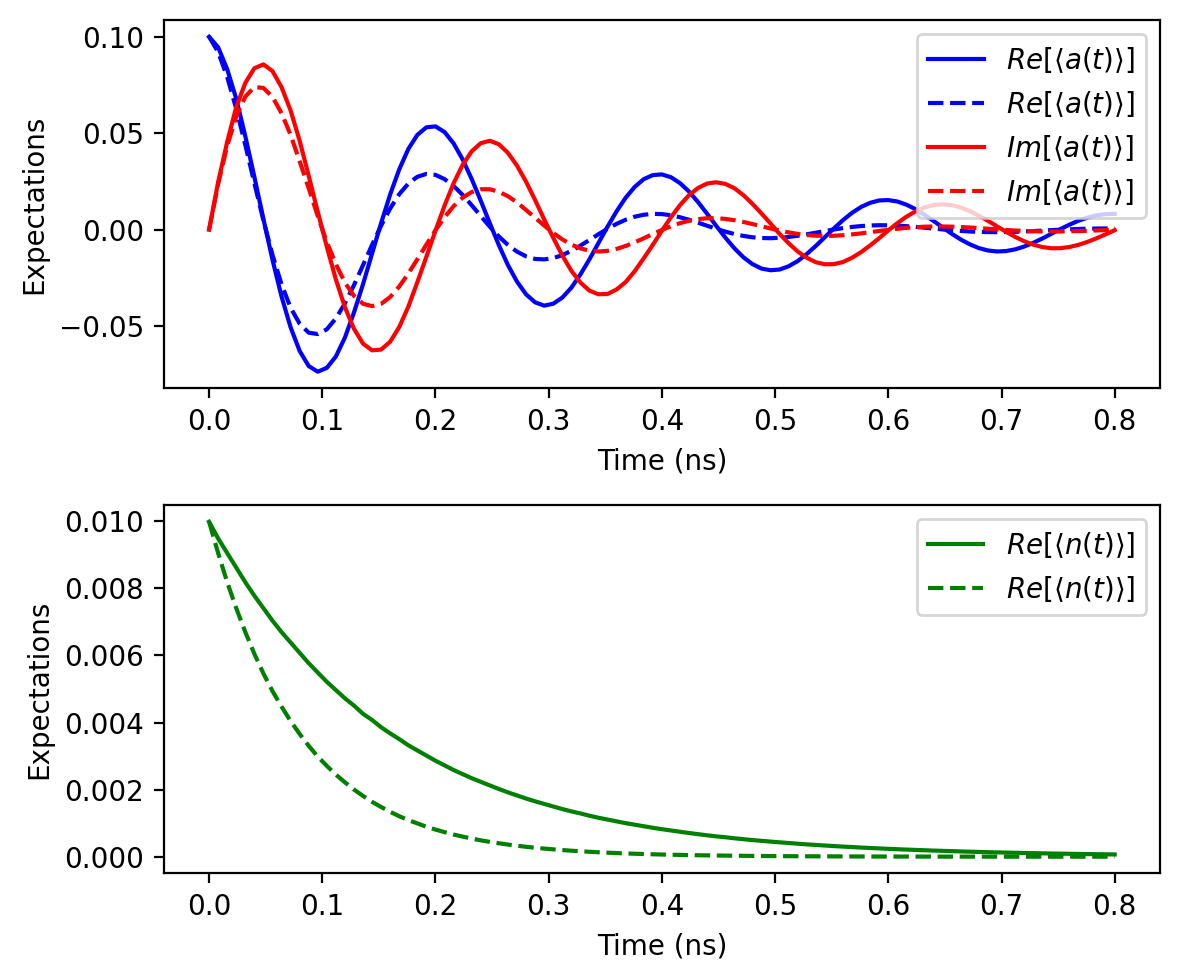

In [8]:
from jax import jit
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt

jqt.set_precision("single")

N = 100
a = jqt.destroy(N); n = a.dag() @ a

omega_a = 2.0*jnp.pi*5.0; H0 = omega_a*n # Hamiltonian

kappa = 2*jnp.pi*jnp.array([1,2]); batched_loss_op = jnp.sqrt(kappa)*a;
c_ops = jqt.Qarray.from_list([batched_loss_op]) # collapse operators

initial_state = (jqt.displace(N, 0.1) @ jqt.basis(N,0)).to_dm() # initial state

ts = jnp.linspace(0, 4*2*jnp.pi/omega_a, 101) # Time points

solver_options = jqt.SolverOptions.create(progress_meter=True)
states = jit(jqt.mesolve, static_argnums=(5))(
    H0, initial_state, ts, c_ops=c_ops, solver_options=solver_options) # solve

n_exp = jnp.real(jqt.overlap(n, states)); a_exp = jqt.overlap(a, states) # expectation values

# Plot

fig, axs = plt.subplots(2,1, dpi=200, figsize=(6,5))
ax = axs[0]
ax.plot(ts, jnp.real(a_exp)[:,0], label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 0
ax.plot(ts, jnp.real(a_exp)[:,1], "--", label=r"$Re[\langle a(t)\rangle]$", color="blue") # Batch kappa value 1
ax.plot(ts, jnp.imag(a_exp)[:,0], label=r"$Im[\langle a(t)\rangle]$", color="red") # Batch kappa value 0
ax.plot(ts, jnp.imag(a_exp)[:,1], "--", label=r"$Im[\langle a(t)\rangle]$", color="red") # Batch kappa value 1
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()

ax = axs[1]
ax.plot(ts, n_exp[:,0], label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 0
ax.plot(ts, n_exp[:,1], "--", label=r"$Re[\langle n(t)\rangle]$", color="green") # Batch kappa value 1
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Expectations")
ax.legend()
fig.tight_layout()

# Diagonalization

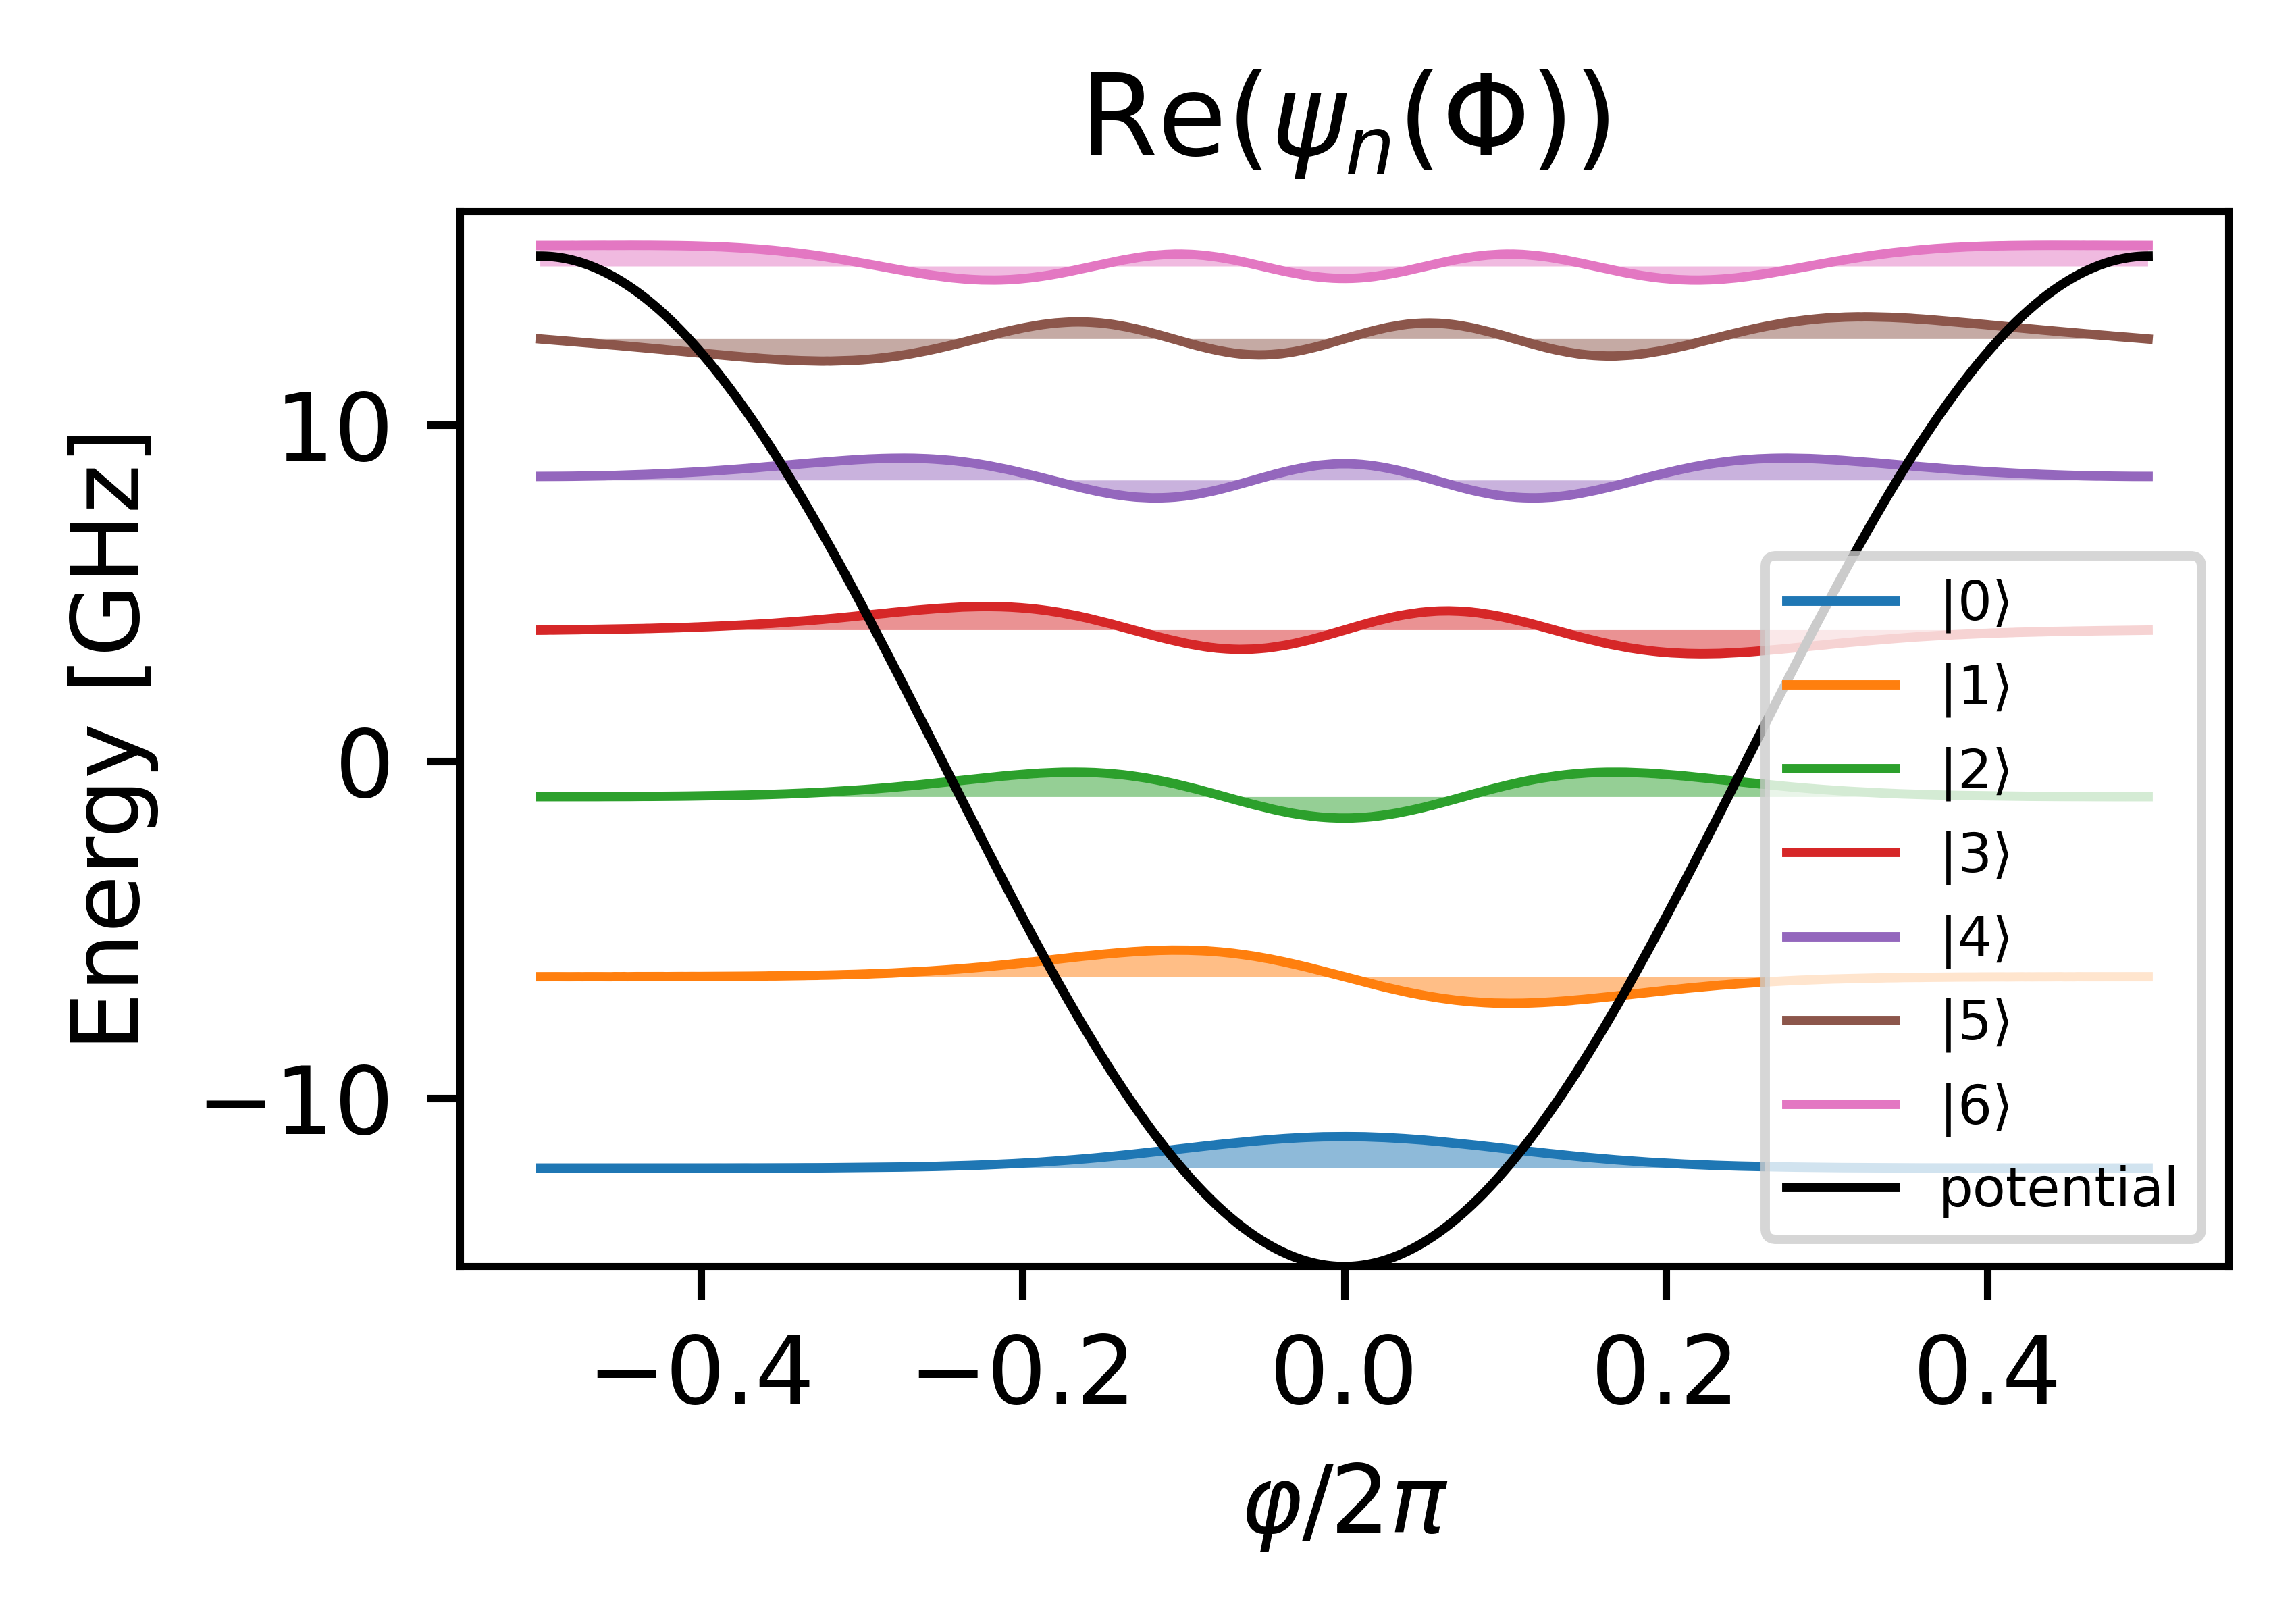

In [9]:
import jaxquantum as jqt
import jaxquantum.devices as jqd

jqt.set_precision("single")

Ec_q = 0.3
Ej_q = 15

qubit = jqd.Transmon.create(
    23,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=23,
)

phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n = 7, mode="real")